In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
data = pd.read_csv(r"C:\Users\JEchevarria\Downloads\DOHMH_School_Cafeteria_inspections_20240529.csv")

In [6]:
# Display the first few rows of the dataset
data.head()

,Record ID,SchoolName,Borough,Building,Street,Address Line 1,City,ZipCode,Last Inspection Date,Permittee,...,Violation Description,Critical Level,LATITUDE,LONGITUDE,COMMUNITYBOARD,COUNCILDISTRICT,CENSUSTRACT,BIN,BBL,NTA
0,347831,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,Brooklyn,616,QUINCY ST,616 QUINCY ST,"BROOKLYN, NY 11221",11221.0,10/08/2019,EMBER CHARTER SCHOOL FOR MINDFUL EDUCATION,...,"No facilities available to wash, rinse and san...",C,40.688688,-73.935499,303.0,36.0,29300.0,3044493.0,3016300001,BK35
1,130374,WILLIAM SPYROPOULOS SCHOOL,Queens,19610,NORTHERN BOULEVARD,19610 NORTHERN BOULEVARD,"FLUSHING, NY 11358",11358.0,01/18/2019,NICHOLAS GREEK ST.,...,Filth flies or food/refuse/sewage-associated (...,C,40.757903,-73.785196,411.0,19.0,145101.0,4124560.0,4055200001,QN48
2,54040,P.S. 145 THE BLOOMINDALE SCHOOL,Manhattan,150,WEST 105 STREET,150 WEST 105 STREET,"NEW YORK, NY 10025",10025.0,11/25/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,...,Non-food contact surface improperly constructe...,G,40.799369,-73.965308,107.0,7.0,18900.0,1076625.0,1018590001,MN12
3,54627,P.S. 119 BROOKLYN,Brooklyn,3829,AVENUE K,3829 AVENUE K,"BROOKLYN, NY 11210",11210.0,07/24/2019,NEW YORK CITY DEPARTMENT OF EDUCATION,...,Accurate thermometer not provided in refrigera...,G,40.625655,-73.938265,318.0,45.0,73400.0,3215816.0,3077860001,BK58
4,82920,MERKAZ HATORAH OF BELLE HARBOR,Queens,505,BEACH 129 STREET,505 BEACH 129 STREET,"BELLE HARBOR, NY 11694",11694.0,11/06/2019,HATORAH OF BELL MERCAZ,...,"Current valid permit, registration or other au...",AV,40.580035,-73.850350,414.0,32.0,93401.0,4304071.0,4161970041,QN10


In [8]:
#Get the numbers of rows and columns
data.shape

(24550, 22)

In [10]:
#Display column names
data.columns

Index(['Record ID', 'SchoolName', 'Borough', 'Building', 'Street',
       'Address Line 1', 'City', 'ZipCode', 'Last Inspection Date',
       'Permittee', 'Inspection Date', 'Code', 'Violation Description',
       'Critical Level', 'LATITUDE', 'LONGITUDE', 'COMMUNITYBOARD',
       'COUNCILDISTRICT', 'CENSUSTRACT', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [11]:
#Data Cleaning
data = data.dropna(subset=['Violation Description', 'Critical Level', 'Borough'])

In [12]:
#Filter for 'C' critical levels
c_critical_data = data[data['Critical Level'] == 'C']

In [13]:
#Group by Borough and count occurrences
grouped_c_critical_data = c_critical_data.groupby('Borough').size().reset_index(name='Counts')

In [14]:
#Display grouped data to verify
print(grouped_c_critical_data.head())

         Borough  Counts
0          Bronx     741
1       Brooklyn    2967
2      Manhattan    1076
3         Queens    1271
4  Staten Island     220


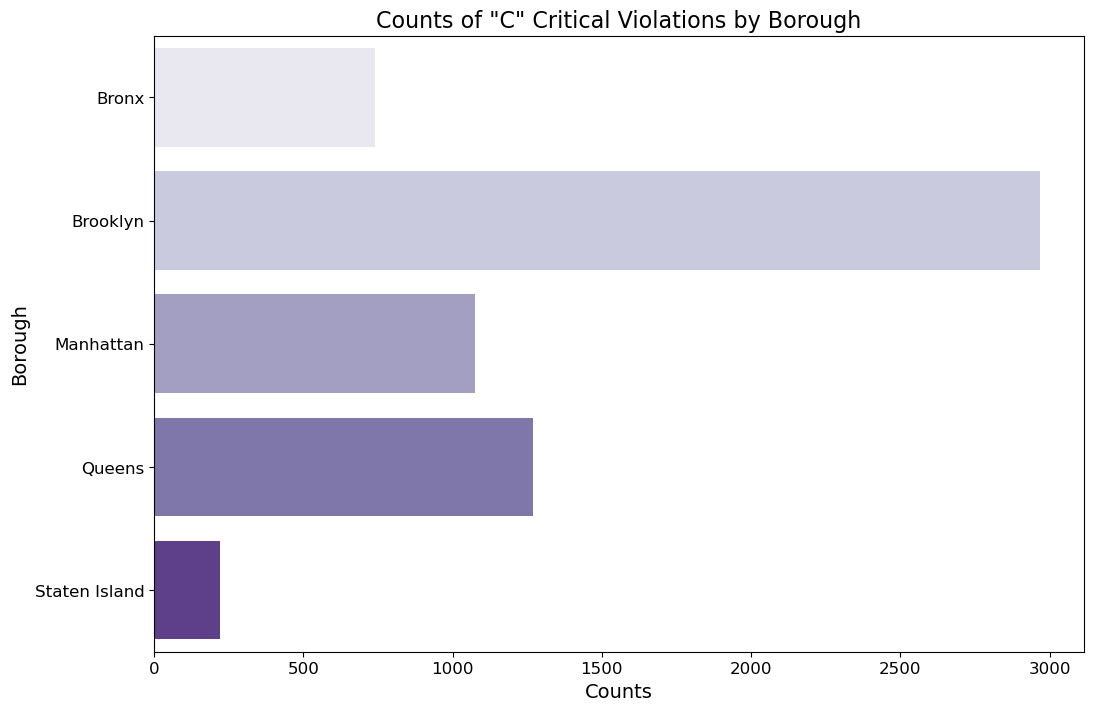

In [21]:
#Plotting critical violations by borough
plt.figure(figsize=(12, 8))
sns.barplot(x='Counts', y='Borough', data=grouped_c_critical_data, palette='Purples')
plt.title('Counts of "C" Critical Violations by Borough', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Borough', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
#Data Cleaning
data = data.dropna(subset=['Violation Description', 'Critical Level', 'Borough', 'SchoolName'])

In [24]:
#Filter for 'C' critical levels
c_critical_data = data[data['Critical Level'] == 'C']

In [25]:
#Group by 'Violation Description' to count occurrences
c_violation_counts = c_critical_data['Violation Description'].value_counts().reset_index()
c_violation_counts.columns = ['Violation Description', 'Counts']

In [26]:
#Find the highest critical violation
highest_c_violation = c_violation_counts.iloc[0]
highest_c_violation

Violation Description    Evidence of mice or live mice present in facil...
Counts                                                                2011
Name: 0, dtype: object

In [27]:
#Group by 'Violation Description' to count occurrences
c_violation_counts = c_critical_data['Violation Description'].value_counts().reset_index()
c_violation_counts.columns = ['Violation Description', 'Counts']

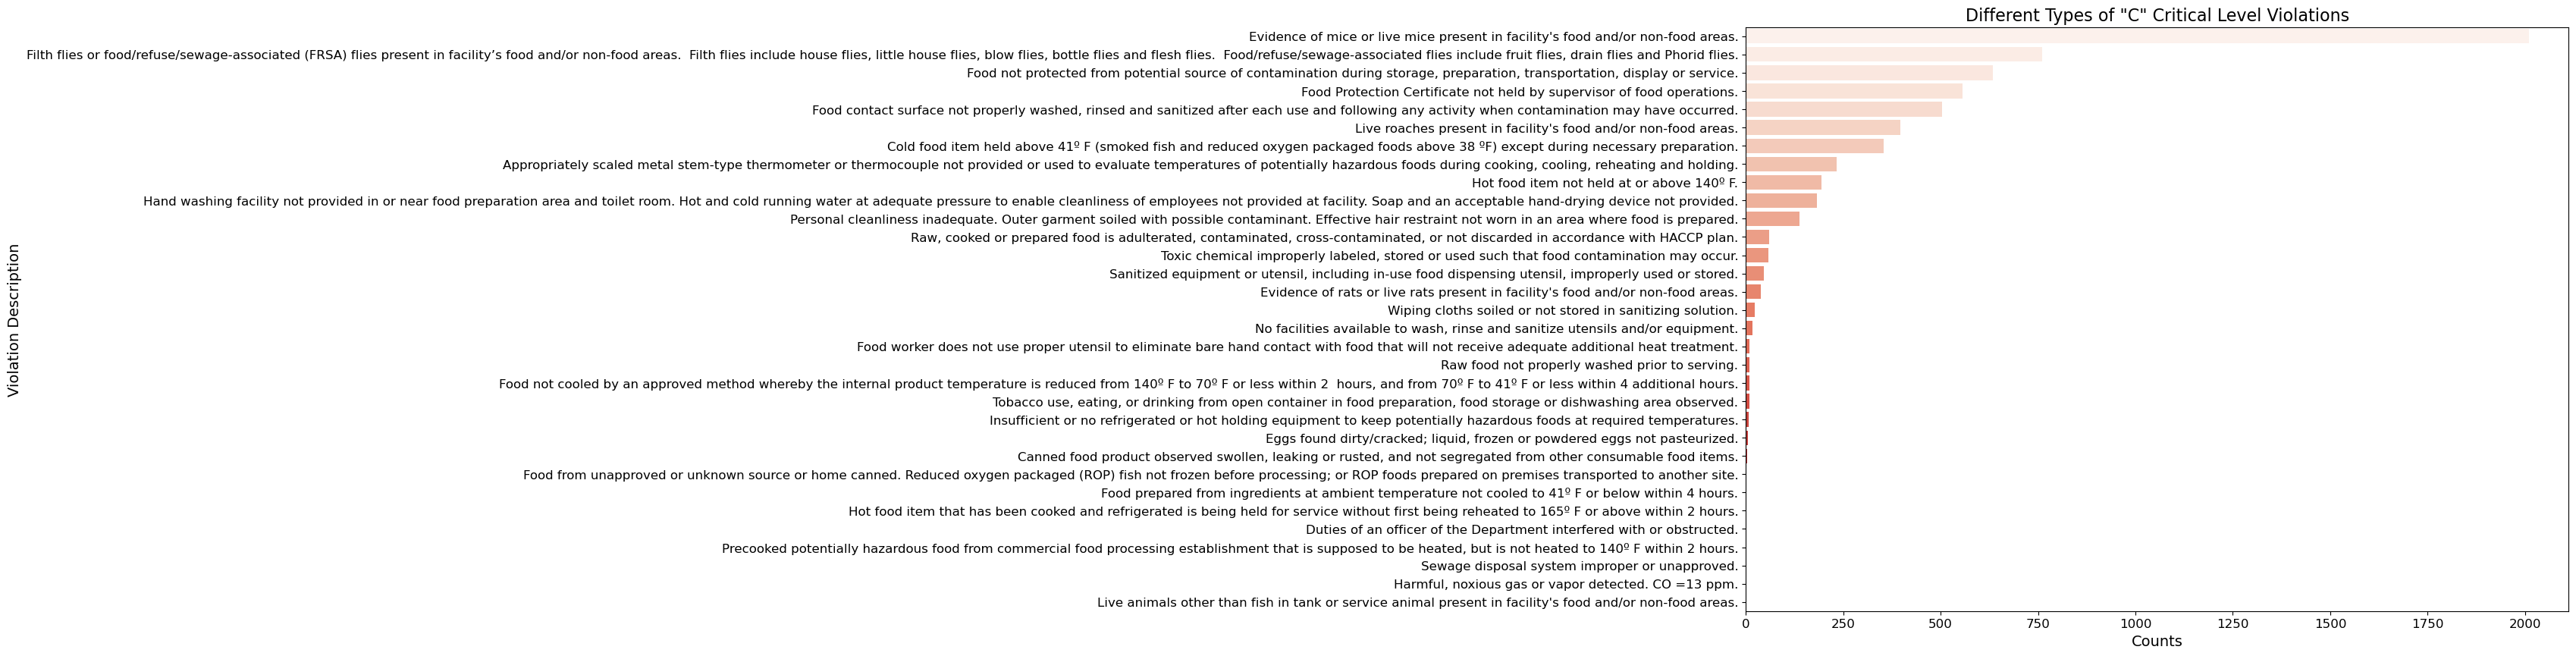

In [29]:
#Plotting the different types of 'C' critical level violations
plt.figure(figsize=(14, 10))
sns.barplot(x='Counts', y='Violation Description', data=c_violation_counts, palette='Reds')
plt.title('Different Types of "C" Critical Level Violations', fontsize=16)
plt.xlabel('Counts', fontsize=14)
plt.ylabel('Violation Description', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [30]:
#Plotting the different types of 'C' critical level violations with wrapped text for better readability
import textwrap

In [31]:
#Function to wrap text
def wrap_labels(labels, width=110):
    return [textwrap.fill(label, width) for label in labels]

In [32]:
#Wrap the violation descriptions
c_violation_counts['Violation Description'] = wrap_labels(c_violation_counts['Violation Description'])

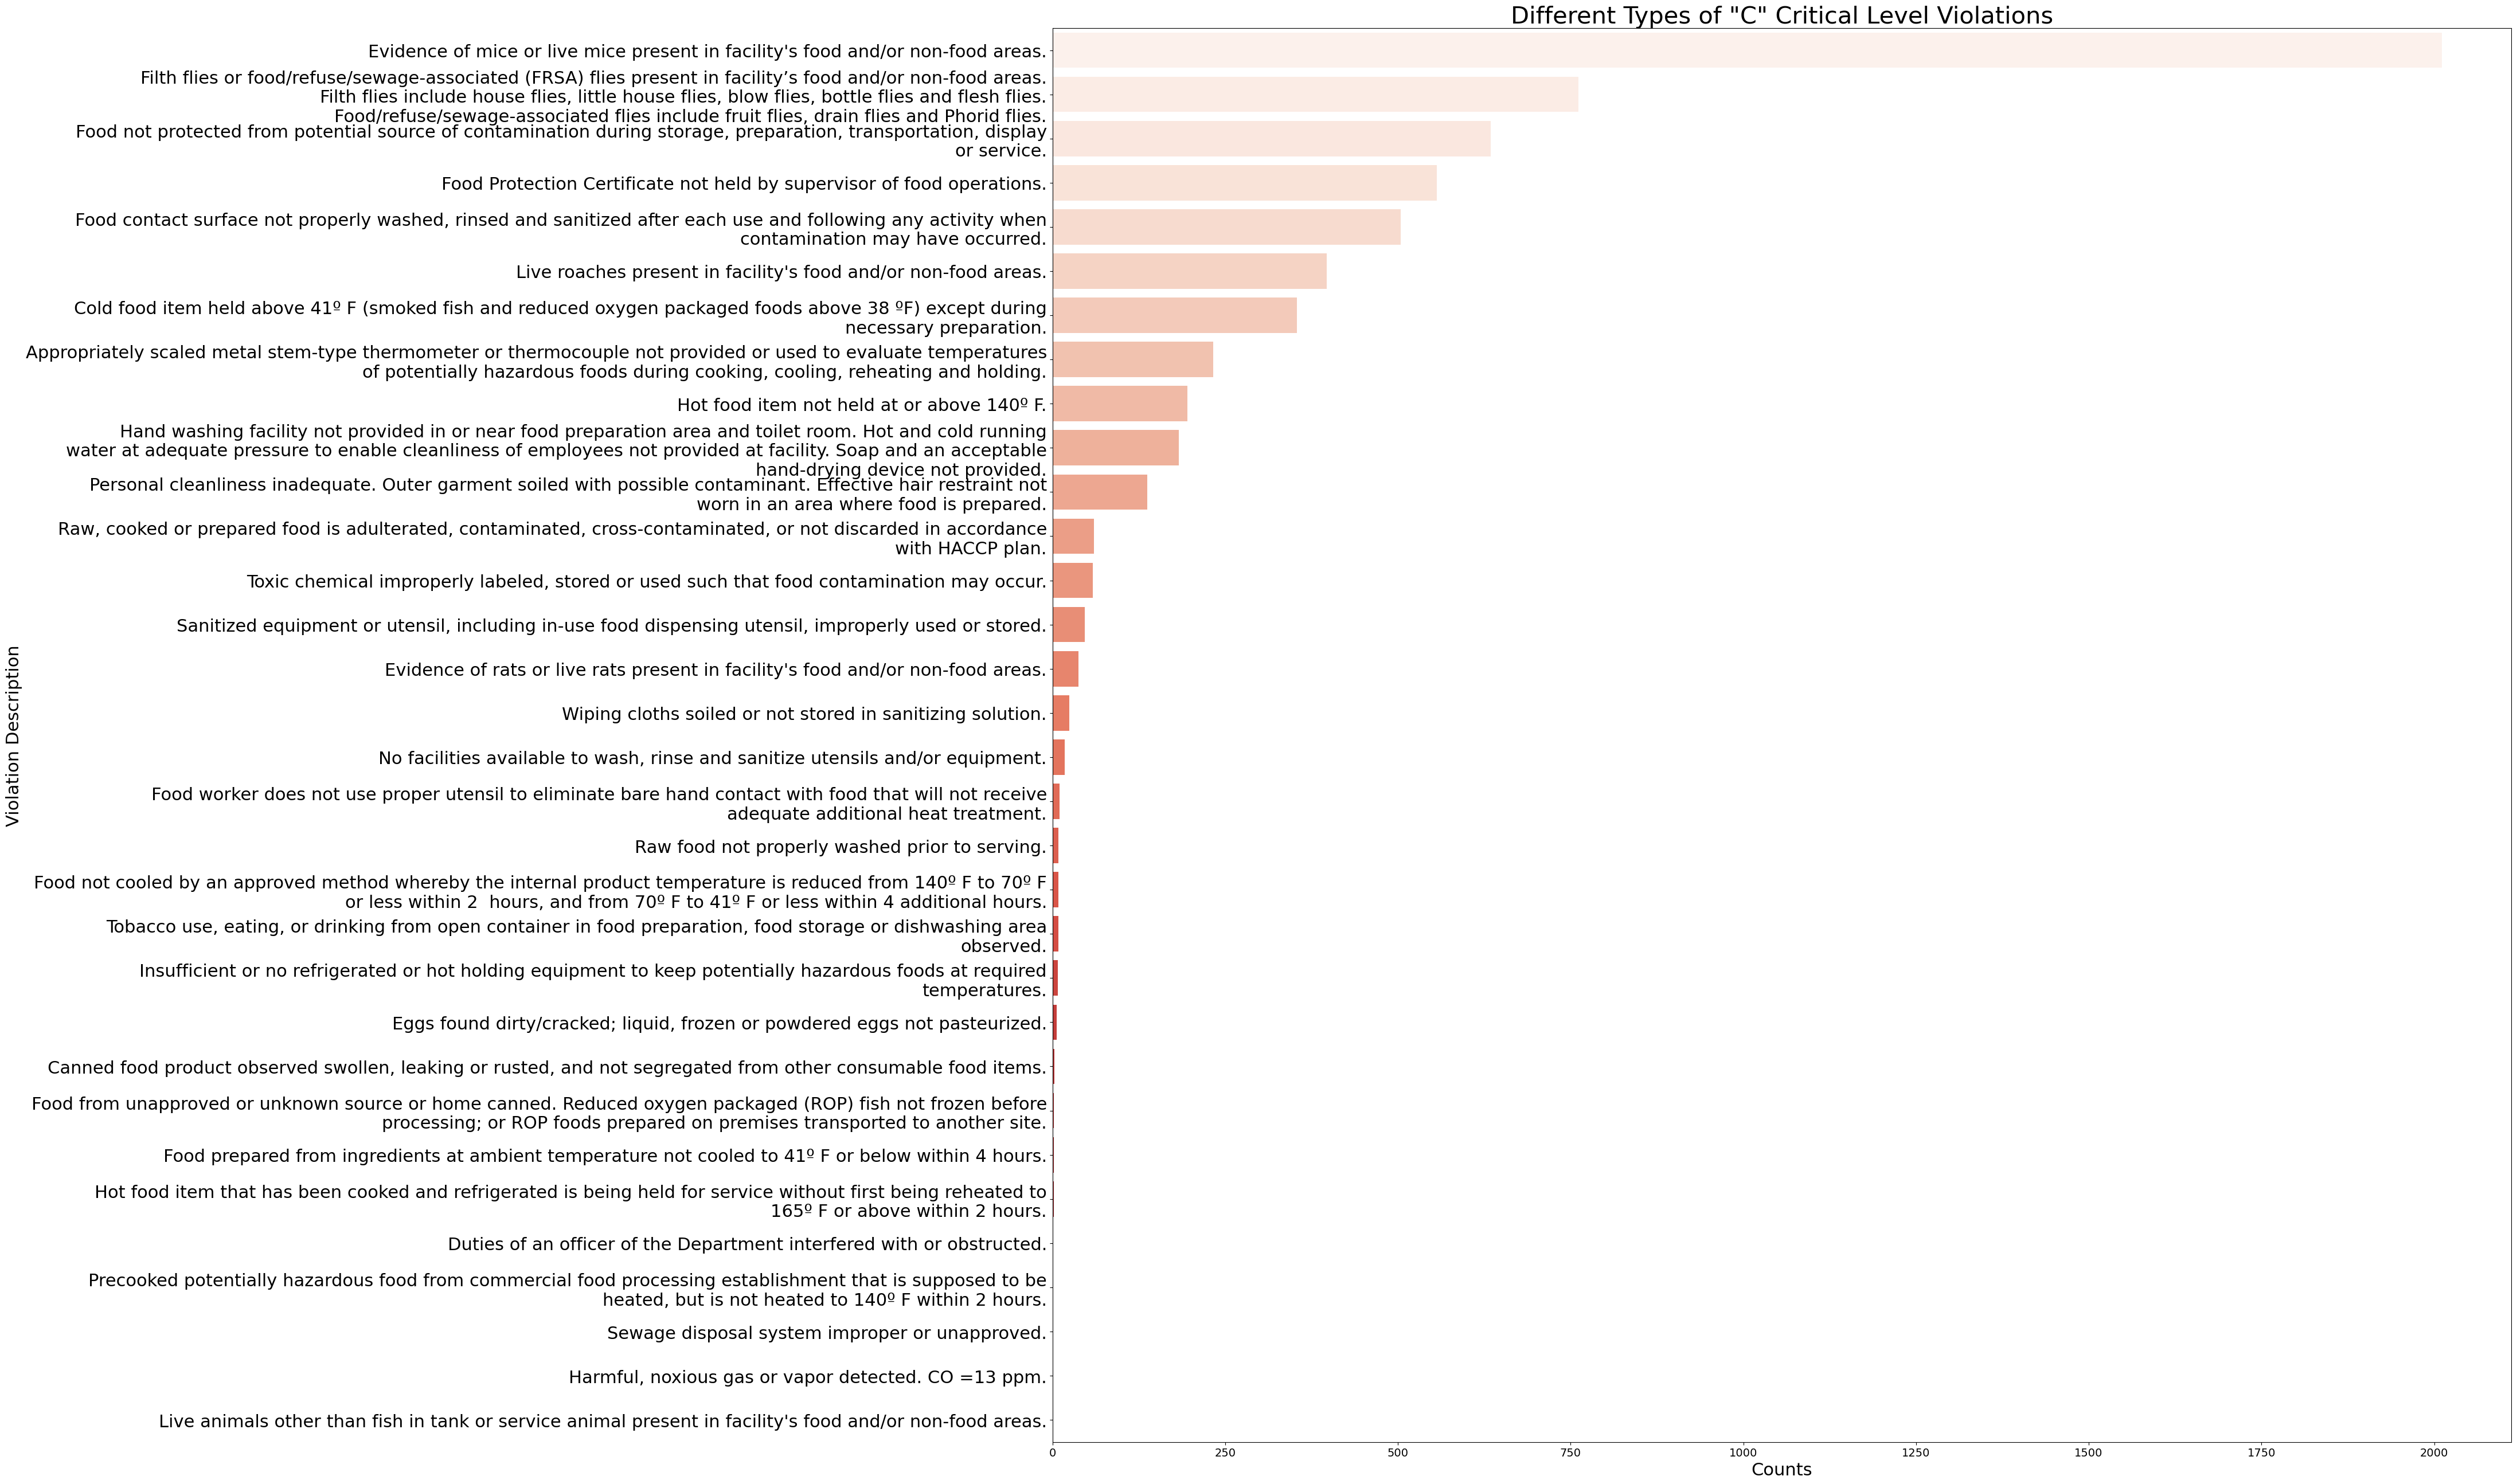

In [34]:
#Plotting the different types of 'C' critical level violations
plt.figure(figsize=(44, 26))
sns.barplot(x='Counts', y='Violation Description', data=c_violation_counts, palette='Reds')
plt.title('Different Types of "C" Critical Level Violations', fontsize=30)
plt.xlabel('Counts', fontsize=22)
plt.ylabel('Violation Description', fontsize=22)
plt.xticks(fontsize=14)
plt.yticks(fontsize=22)
plt.tight_layout()
plt.show()

In [46]:
# Data Cleaning
data = data.dropna(subset=['Borough', 'SchoolName'])

In [47]:
# Count the number of schools in each borough
borough_school_counts = data['Borough'].value_counts().reset_index()
borough_school_counts.columns = ['Borough', 'Counts']

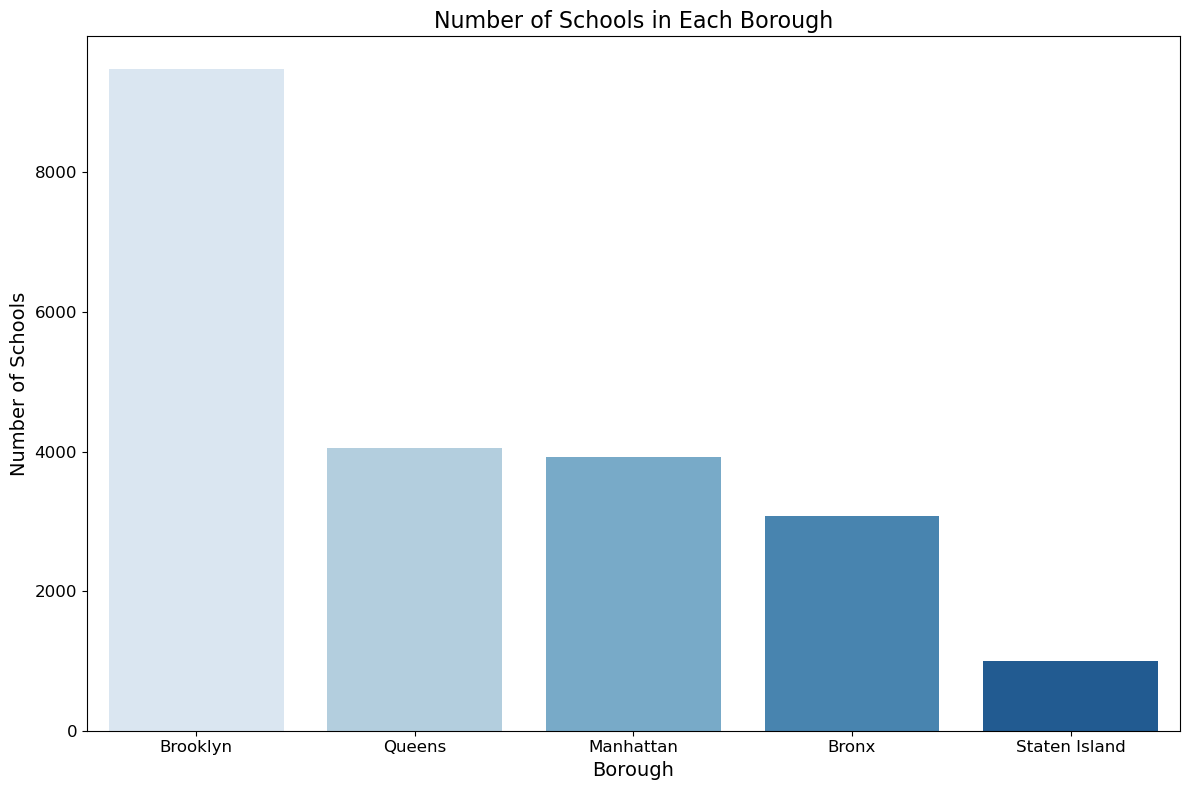

In [48]:
# Plotting the number of schools in each borough
plt.figure(figsize=(12, 8))
sns.barplot(x='Borough', y='Counts', data=borough_school_counts, palette='Blues')
plt.title('Number of Schools in Each Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Schools', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#Data Cleaning
data = data.dropna(subset=['Borough', 'SchoolName'])

In [ ]:
#Count the number of schools in each borough
borough_school_counts = data['Borough'].value_counts().reset_index()
borough_school_counts.columns = ['Borough', 'Counts']

In [ ]:
#Generate statistics for the number of schools in each borough
borough_stats = borough_school_counts.describe()
print(borough_stats)

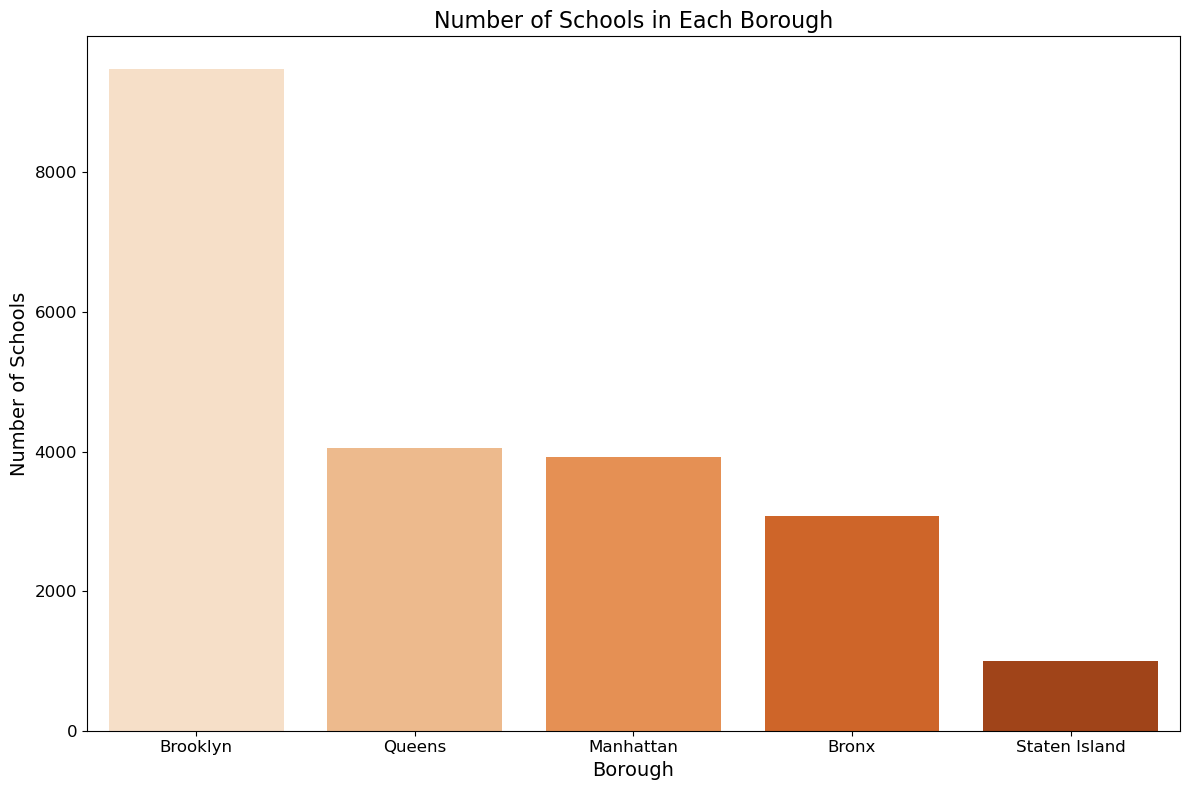

In [49]:
#Plotting the number of schools in each borough
plt.figure(figsize=(12, 8))
sns.barplot(x='Borough', y='Counts', data=borough_school_counts, palette='Oranges')
plt.title('Number of Schools in Each Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Schools', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
#Data Cleaning
data = data.dropna(subset=['Violation Description', 'Critical Level', 'Borough', 'SchoolName'])

In [40]:
#Filter for 'C' critical levels
c_critical_data = data[data['Critical Level'] == 'C']

In [41]:
#Calculate the number of schools in each borough
borough_school_counts = data['Borough'].value_counts().reset_index()
borough_school_counts.columns = ['Borough', 'School_Count']

In [42]:
#Calculate the number of 'C' critical level violations in each borough
c_critical_counts = c_critical_data['Borough'].value_counts().reset_index()
c_critical_counts.columns = ['Borough', 'Critical_Violation_Count']

In [43]:
#Merge the two dataframes on 'Borough'
merged_counts = pd.merge(borough_school_counts, c_critical_counts, on='Borough')

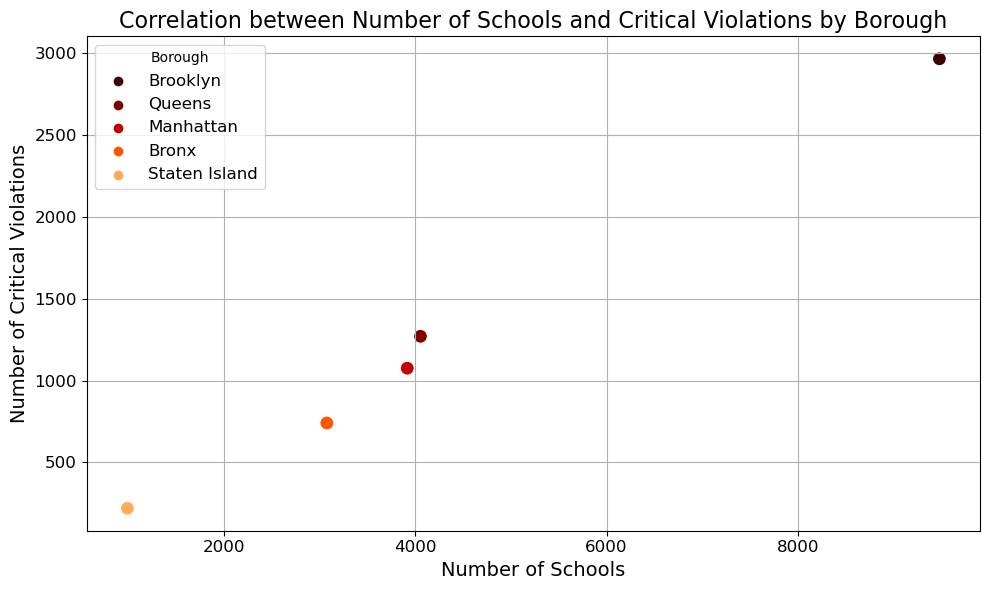

In [44]:
# Plotting the correlation between the number of schools and critical violations in each borough
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_counts, x='School_Count', y='Critical_Violation_Count', hue='Borough', s=100, palette='gist_heat')
plt.title('Correlation between Number of Schools and Critical Violations by Borough', fontsize=16)
plt.xlabel('Number of Schools', fontsize=14)
plt.ylabel('Number of Critical Violations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Borough', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
#Display the merged data for reference
print(merged_counts)

         Borough  School_Count  Critical_Violation_Count
0       Brooklyn          9476                      2967
1         Queens          4056                      1271
2      Manhattan          3918                      1076
3          Bronx          3078                       741
4  Staten Island           995                       220
